<a href="https://colab.research.google.com/github/khalidme94/ML/blob/main/Copy_of_seattle_rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Rain in Seattle
Seattle is one of the rainiest places in the world. Even so, it is worth asking the question 'will it rain tomorrow.' Imagine you are headed to sleep at a hotel in downtown Seattle. 

The next days activities are supposed to include walking around outside most of the day. You want to know if it will rain or not (you don't really care how much rain just a simple yes or no will do), which will greatly impact what you choose to wear and carry around (like an umbrella). 


Build a heuristic model to predict if it will rain tomorrow.



## Our Data

Importing needed libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

Reading the csv file

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv')



In [ ]:
df.shape

(25551, 5)

In [ ]:
df.sample(5)

,ds,prcp,tmax,tmin,rain
20196,2003-04-18,0.00,55,41,False
7813,1969-05-23,0.02,90,56,True
4134,1959-04-27,0.21,50,43,True
13461,1984-11-08,0.26,50,38,True
14512,1987-09-25,0.00,62,54,False


EDA Questions

In [ ]:
# what % of days did it rain?

rain_days_percentage=(df[df['rain']==True].rain.count()/df['rain'].count())*100

print(f'The percentage of rain days is %{rain_days_percentage}')

The percentage of rain days is %42.66478785032096


In [ ]:
# what values are seen in the prcp column

df.prcp.value_counts()

0.00    14648
0.01      933
0.02      707
0.03      493
0.04      428
        ...  
2.49        1
2.18        1
2.20        1
2.70        1
2.95        1
Name: prcp, Length: 207, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


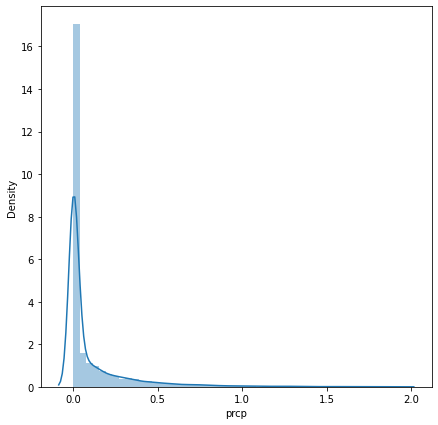

In [ ]:
# show me a histogram of prcp < 2
plt.figure(figsize=(7,7))
sns.distplot(df[df['prcp']<2].prcp)

#### Check for Missing Values and Outliers

In [ ]:
# how many null values does each column have?
df.isnull().sum()

ds      0
prcp    3
tmax    0
tmin    0
rain    3
dtype: int64

In [ ]:
# show me the null rows
df1 = df[df.isnull().any(axis=1)]
df1

,ds,prcp,tmax,tmin,rain
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [ ]:
# drop the null rows and update the dataframe
df=df.dropna()
df.isnull().sum()

ds      0
prcp    0
tmax    0
tmin    0
rain    0
dtype: int64

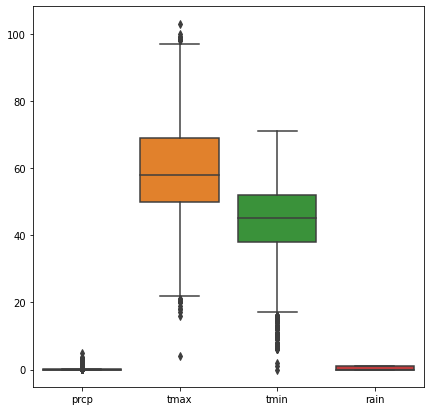

In [ ]:
# make a box plot
plt.figure(figsize=(7,7))
sns.boxplot(data=df)

In [ ]:
# show me some outler values from tmax or tmin
from scipy import stats
z=np.abs(stats.zscore(df.tmin))
print(z)

[0.28263021 0.95732996 1.06977992 ... 1.4071298  1.18222988 0.95732996]


In [ ]:
print(np.where(z > 3))

(array([  358,   368,   374,   375,   376,   388,   389,   390,   393,
         718,   732,   733,   734,   743,   744,   745,   746,   747,
         748,   754,   755,   758,   759,   760,   761,   762,   763,
         764,  1123,  1124,  1125,  1152,  1460,  1461,  1463,  1793,
        2211,  2619,  2620,  2871,  2872,  2873,  2874,  2875,  2951,
        2952,  2967,  2968,  3311,  3312,  3313,  3314,  3315,  4019,
        4020,  4021,  5133,  5134,  5488,  5489,  5490,  6194,  6195,
        7667,  7668,  7669,  7670,  7693,  7698,  8792,  8793,  8795,
        9108,  9137,  9505, 11320, 11321, 11322, 11716, 12423, 12424,
       13138, 13139, 13140, 13141, 13840, 13841, 13842, 15007, 15008,
       15009, 15010, 15011, 15693, 15694, 15695, 15696, 15702, 15703,
       17561, 18614, 18616, 22266, 22621, 22969, 22970]),)


I tried this solution also to find outlier for both columns but it seems there is an illogic result for "tmin" ,so I prefer to keep it to get a feedback on it.

In [ ]:

max_low = df["tmax"].quantile(0.01)
max_hi  = df["tmax"].quantile(0.99)

min_low = df["tmin"].quantile(0.01)
min_hi  = df["tmin"].quantile(0.99)

print(f'The first low oultlier for "tmax" column is {max_low}\nThe first high oultlier for "tmax" column is {max_hi}\n')
print(f'The first low oultlier for "tmin" column is {min_low}\nThe first high oultlier for "tmax" column is {min_hi}')

The first low oultlier for "tmax" column is 34.0
The first high oultlier for "tmax" column is 89.0

The first low oultlier for "tmin" column is 23.0
The first high oultlier for "tmax" column is 61.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 504x504 with 0 Axes>

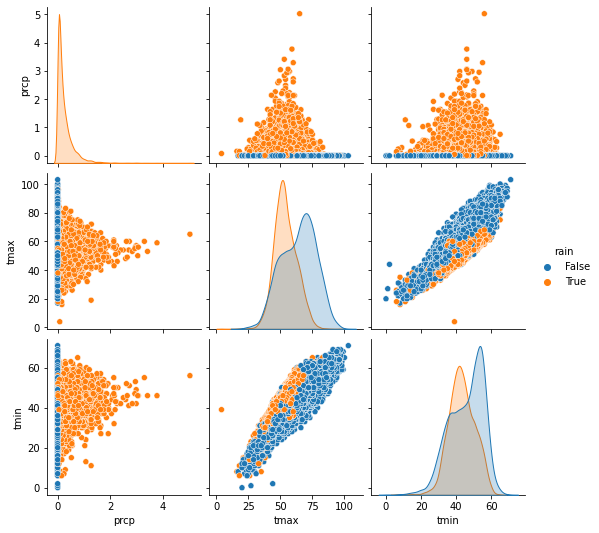

In [ ]:
# make an sns pairplot with hue='rain'
plt.figure(figsize=(7,7))
sns.pairplot(data=df,hue='rain')

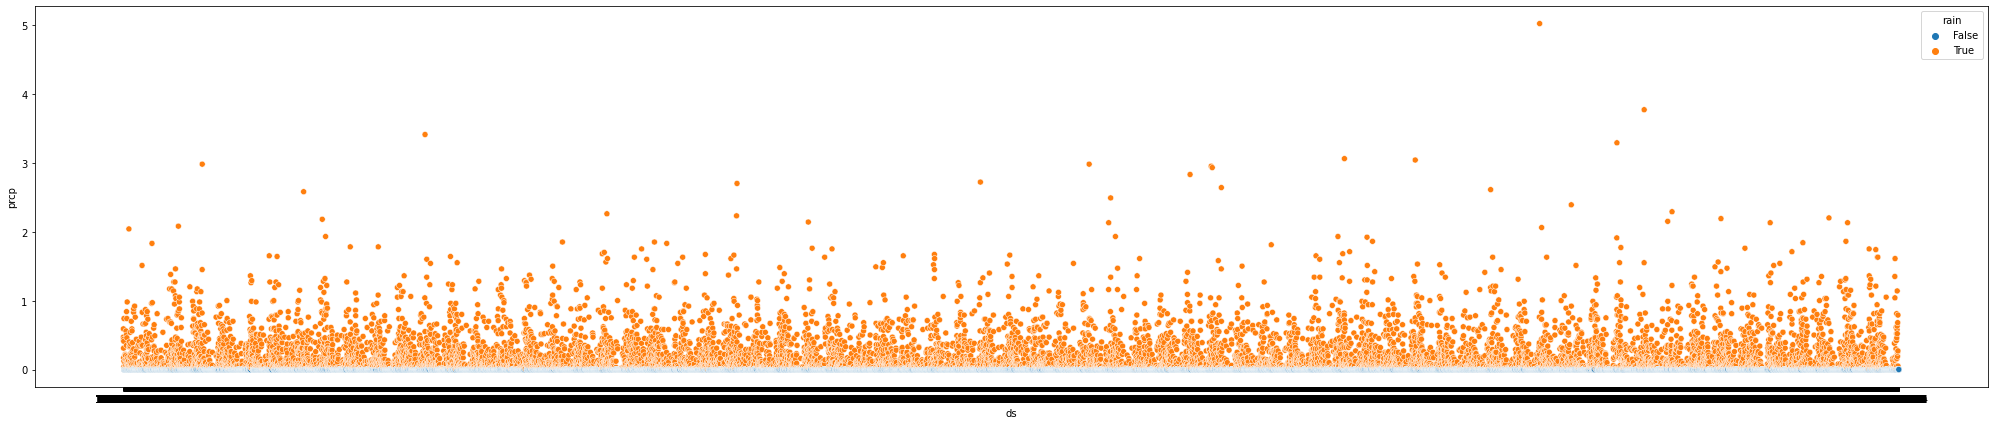

In [ ]:
# bonus challenge
# plot prcp by day (ds on x axis)
plt.figure(figsize=(35,7))
sns.scatterplot(data=df,x='ds',y='prcp',hue='rain')

## Set up a basic model to make predicitons

First, split the data...

In [ ]:


X = df[['prcp', 'tmax', 'tmin']]  # all the values you want to help predict the target value
y = df.rain.astype(np.int32)  # the target value

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Bring in a model now...

In [ ]:


# logistic regression is a classifier, for our case, True (1) or False (0)
lr = LogisticRegression()

lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predict the y values from X test data
lr.predict(X_test)

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
preds = lr.predict(X_test)

In [ ]:
# how'd your model score?

score= accuracy_score(y_test, preds)
print(f'The model score is %{round(score*100)}')

The model score is %93
